Importing Dependencies

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
# loading the dataset to pandas DataFrame
bike_dataset = pd.read_excel('/content/Data file.xlsx')

In [4]:
type(bike_dataset)

pandas.core.frame.DataFrame

In [5]:
# printing the first 5 rows of the dataframe
bike_dataset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_size,Product_price,...,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Age,Purchased Bike
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,71.49,...,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,42,No
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,large,2091.47,...,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,43,No
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,medium,1793.43,...,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,60,No
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,1198.46,...,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,41,Yes
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,large,1765.30,...,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,36,Yes


In [6]:
# number of rows and columns
bike_dataset.shape

(1000, 23)

In [8]:
# statistical measures
bike_dataset.describe()

,transaction_id,product_id,customer_id,online_order,Product_price,standard_cost,Expenditure on Advertisement,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,983.00000,1000.000000,994.000000,200.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,46.344000,1764.871000,0.48118,1115.671150,548.930161,23.264000,56140.000000,1.908000,1.452000,44.190000
std,288.819436,31.182688,1022.584275,0.49990,570.796375,395.001672,14.846809,31081.609779,1.626094,1.124705,11.353537
min,1.000000,0.000000,1.000000,0.00000,12.010000,7.210000,0.000000,10000.000000,0.000000,0.000000,25.000000
25%,250.750000,17.750000,859.250000,0.00000,590.260000,215.030000,9.975000,30000.000000,0.000000,1.000000,35.000000
50%,500.500000,45.000000,1746.000000,0.00000,1163.890000,507.580000,22.900000,60000.000000,2.000000,1.000000,43.000000
75%,750.250000,76.000000,2673.000000,1.00000,1635.300000,778.690000,36.525000,70000.000000,3.000000,2.000000,52.000000
max,1000.000000,100.000000,3499.000000,1.00000,2091.470000,1759.850000,49.600000,170000.000000,5.000000,4.000000,89.000000


In [9]:
# number of missing values in each column
bike_dataset.isnull().sum()

transaction_id                    0
product_id                        0
customer_id                       0
transaction_date                  0
online_order                     17
order_status                      0
brand                             6
product_line                      6
product_size                      6
Product_price                     0
standard_cost                     6
Expenditure on Advertisement    800
Marital Status                    0
Gender                            0
Income                            0
Children                          0
Education                         0
Occupation                        0
Home Owner                        0
Cars                              0
Commute Distance                  0
Age                               0
Purchased Bike                    0
dtype: int64

In [11]:
# dropping column 'Expenditure on Advertisement' 
del bike_dataset["Expenditure on Advertisement"]

In [15]:
# dropping the remaining missing values
bike_dataset = bike_dataset.dropna()

In [14]:
# number of missing values in each column after dropping the null values
bike_dataset.isnull().sum()

transaction_id      0
product_id          0
customer_id         0
transaction_date    0
online_order        0
order_status        0
brand               0
product_line        0
product_size        0
Product_price       0
standard_cost       0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Age                 0
Purchased Bike      0
dtype: int64

In [16]:
# label encoding
bike_dataset.replace({"Purchased Bike":{'No':0,'Yes':1}},inplace=True)

In [17]:
# printing the first 5 rows of the dataframe
bike_dataset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_size,Product_price,...,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Age,Purchased Bike
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,71.49,...,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,42,0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,large,2091.47,...,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,43,0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,medium,1793.43,...,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,60,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,1198.46,...,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,41,1
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,large,1765.30,...,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,36,1


In [18]:
# dropping the unnecessary columns
bike_dataset=bike_dataset.drop(columns=['transaction_id',	'product_id',	'customer_id'	,'transaction_date'],axis=1)

In [19]:
# printing the first 5 rows of the dataframe
bike_dataset.head()

,online_order,order_status,brand,product_line,product_size,Product_price,standard_cost,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Age,Purchased Bike
0,0.0,Approved,Solex,Standard,medium,71.49,53.62,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,42,0
1,1.0,Approved,Trek Bicycles,Standard,large,2091.47,388.92,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,43,0
2,0.0,Approved,OHM Cycles,Standard,medium,1793.43,248.82,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,60,0
3,0.0,Approved,Norco Bicycles,Standard,medium,1198.46,381.10,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,41,1
4,1.0,Approved,Giant Bicycles,Standard,large,1765.30,709.48,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,36,1


Data Visualization

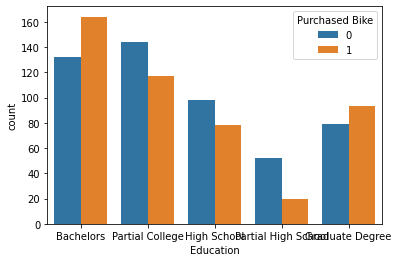

In [20]:
# Education & Purchase Status
sns.countplot(x='Education',hue='Purchased Bike',data=bike_dataset)

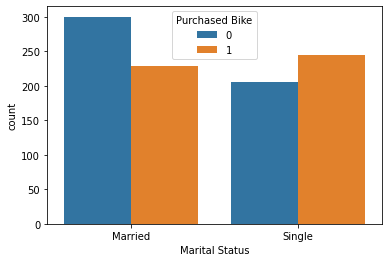

In [21]:
# Marital status & Purchase Status
sns.countplot(x='Marital Status',hue='Purchased Bike',data=bike_dataset)

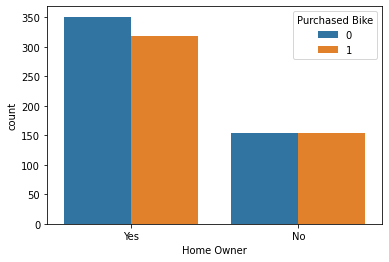

In [22]:
# Home Owner & Purchase Status
sns.countplot(x='Home Owner',hue='Purchased Bike',data=bike_dataset)

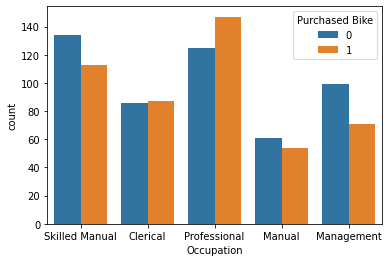

In [23]:
# Occupation & Purchase Status
sns.countplot(x='Occupation',hue='Purchased Bike',data=bike_dataset)

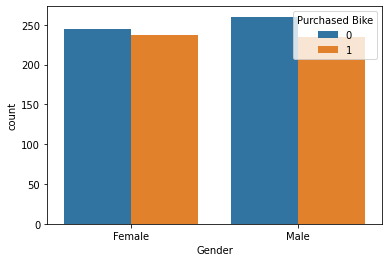

In [24]:
# Gender & Purchase Status
sns.countplot(x='Gender',hue='Purchased Bike',data=bike_dataset)

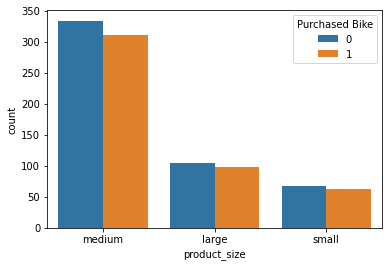

In [25]:
# Product size & Purchase Status
sns.countplot(x='product_size',hue='Purchased Bike',data=bike_dataset)

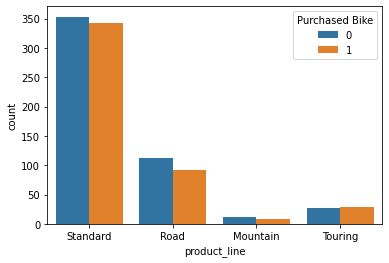

In [26]:
# Product line & Purchase Status
sns.countplot(x='product_line',hue='Purchased Bike',data=bike_dataset)

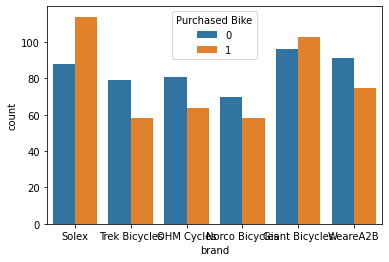

In [27]:
# Brand & Purchase Status
sns.countplot(x='brand',hue='Purchased Bike',data=bike_dataset)

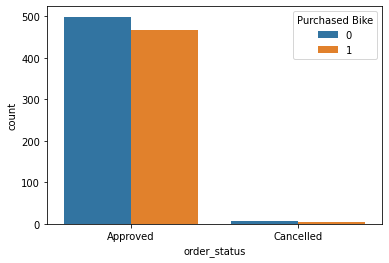

In [28]:
# Order Status & Purchase Status
sns.countplot(x='order_status',hue='Purchased Bike',data=bike_dataset)

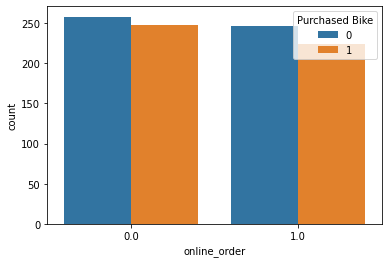

In [29]:
# Online order & Purchase Status
sns.countplot(x='online_order',hue='Purchased Bike',data=bike_dataset)

In [52]:
# convert categorical columns to numerical values
bike_dataset.replace({'Marital Status':{'Married':1,'Single':0},'Gender':{'Male':1,'Female':0},'Home Owner':{'No':0,'Yes':1},
                      'Occupation':{'Skilled Manual':0,'Professional':1,'Manual':2,'Management':3,'Clerical':4},'order_status':{'Approved':1,'Cancelled':0},
                      'brand':{'Giant Bicycles':0,'Norco Bicycles':1,'OHM Cycles':2,'Solex':3,'Trek Bicycles':4,'WeareA2B':5},
                      'Commute Distance':{'0-1 Miles':0,'1-2 Miles':1,'2-5 Miles':2,'5-10 Miles':3,'10+ Miles':4},
                      'product_size':{'large':2,'medium':1,'small':0},'product_line':{'Standard':3,'Mountain':2,'Road':1,'Touring':0},
                      'Education':{'Partial High School':4,'Partial College':3,'High School':2,'Graduate Degree':1,'Bachelors':0}},inplace=True)

In [53]:
# printing the first 5 rows of the dataframe
bike_dataset.head()

,online_order,order_status,brand,product_line,product_size,Product_price,standard_cost,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Age,Purchased Bike
0,0.0,1,3,3,1,71.49,53.62,1,0,40000,1,0,0,1,0,0,42,0
1,1.0,1,4,3,2,2091.47,388.92,1,1,30000,3,3,4,1,1,0,43,0
2,0.0,1,2,3,1,1793.43,248.82,1,1,80000,5,3,1,0,2,2,60,0
3,0.0,1,1,3,1,1198.46,381.10,0,1,70000,0,0,1,1,1,3,41,1
4,1.0,1,0,3,2,1765.30,709.48,0,1,30000,0,0,4,0,0,0,36,1


In [54]:
# separating the data and label
X = bike_dataset.drop(columns=['Purchased Bike'],axis=1)
Y = bike_dataset['Purchased Bike']

In [55]:
print(X)
print(Y)

     online_order  order_status  brand  product_line  product_size  \
0             0.0             1      3             3             1   
1             1.0             1      4             3             2   
2             0.0             1      2             3             1   
3             0.0             1      1             3             1   
4             1.0             1      0             3             2   
..            ...           ...    ...           ...           ...   
995           1.0             1      0             3             0   
996           0.0             1      5             3             0   
997           0.0             1      0             3             1   
998           1.0             1      5             3             1   
999           1.0             1      3             0             2   

     Product_price  standard_cost  Marital Status  Gender  Income  Children  \
0            71.49          53.62               1       0   40000         1   
1

Train Test Split

In [56]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(977, 17) (879, 17) (98, 17)


Training the Model:
Support Vector Machine Model

In [66]:
classifier = svm.SVC(kernel='linear')

In [67]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [68]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [69]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.5927189988623436


In [70]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [71]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.5408163265306123


Model Training: Logistic Regression

In [73]:
model = LogisticRegression()

In [74]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation: Accuracy Score

In [75]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [76]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6109215017064846


In [77]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [78]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.6224489795918368
